In [1]:
from utilities import startup
provider = startup(check=True)

Account enabled
Provider: ibm-q-melbourne
ibmq_montreal has 5 queud and 27 qubits
ibmq_toronto has 1 queud and 27 qubits
ibmq_kolkata has 86 queud and 27 qubits
ibmq_mumbai has 5 queud and 27 qubits
ibmq_lima has 291 queud and 5 qubits
ibmq_belem has 21 queud and 5 qubits
ibmq_quito has 24 queud and 5 qubits
ibmq_guadalupe has 2 queud and 16 qubits
ibmq_jakarta has 13 queud and 7 qubits
ibmq_manila has 84 queud and 5 qubits
ibm_hanoi has 6 queud and 27 qubits
ibm_lagos has 91 queud and 7 qubits
ibm_nairobi has 502 queud and 7 qubits
ibm_cairo has 1 queud and 27 qubits
ibm_auckland has 1 queud and 27 qubits
ibm_perth has 2 queud and 7 qubits
ibm_washington has 837 queud and 127 qubits
ibm_oslo has 276 queud and 7 qubits
ibm_geneva has 1 queud and 27 qubits


## GHZ Circuit Generator Depth Plots

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from ghzstate import GHZState

from qiskit.visualization import plot_gate_map, plot_coupling_map

In [3]:
def calc_d(n):
    return 0.5*(np.sqrt(8*(n) - 7) - 1)

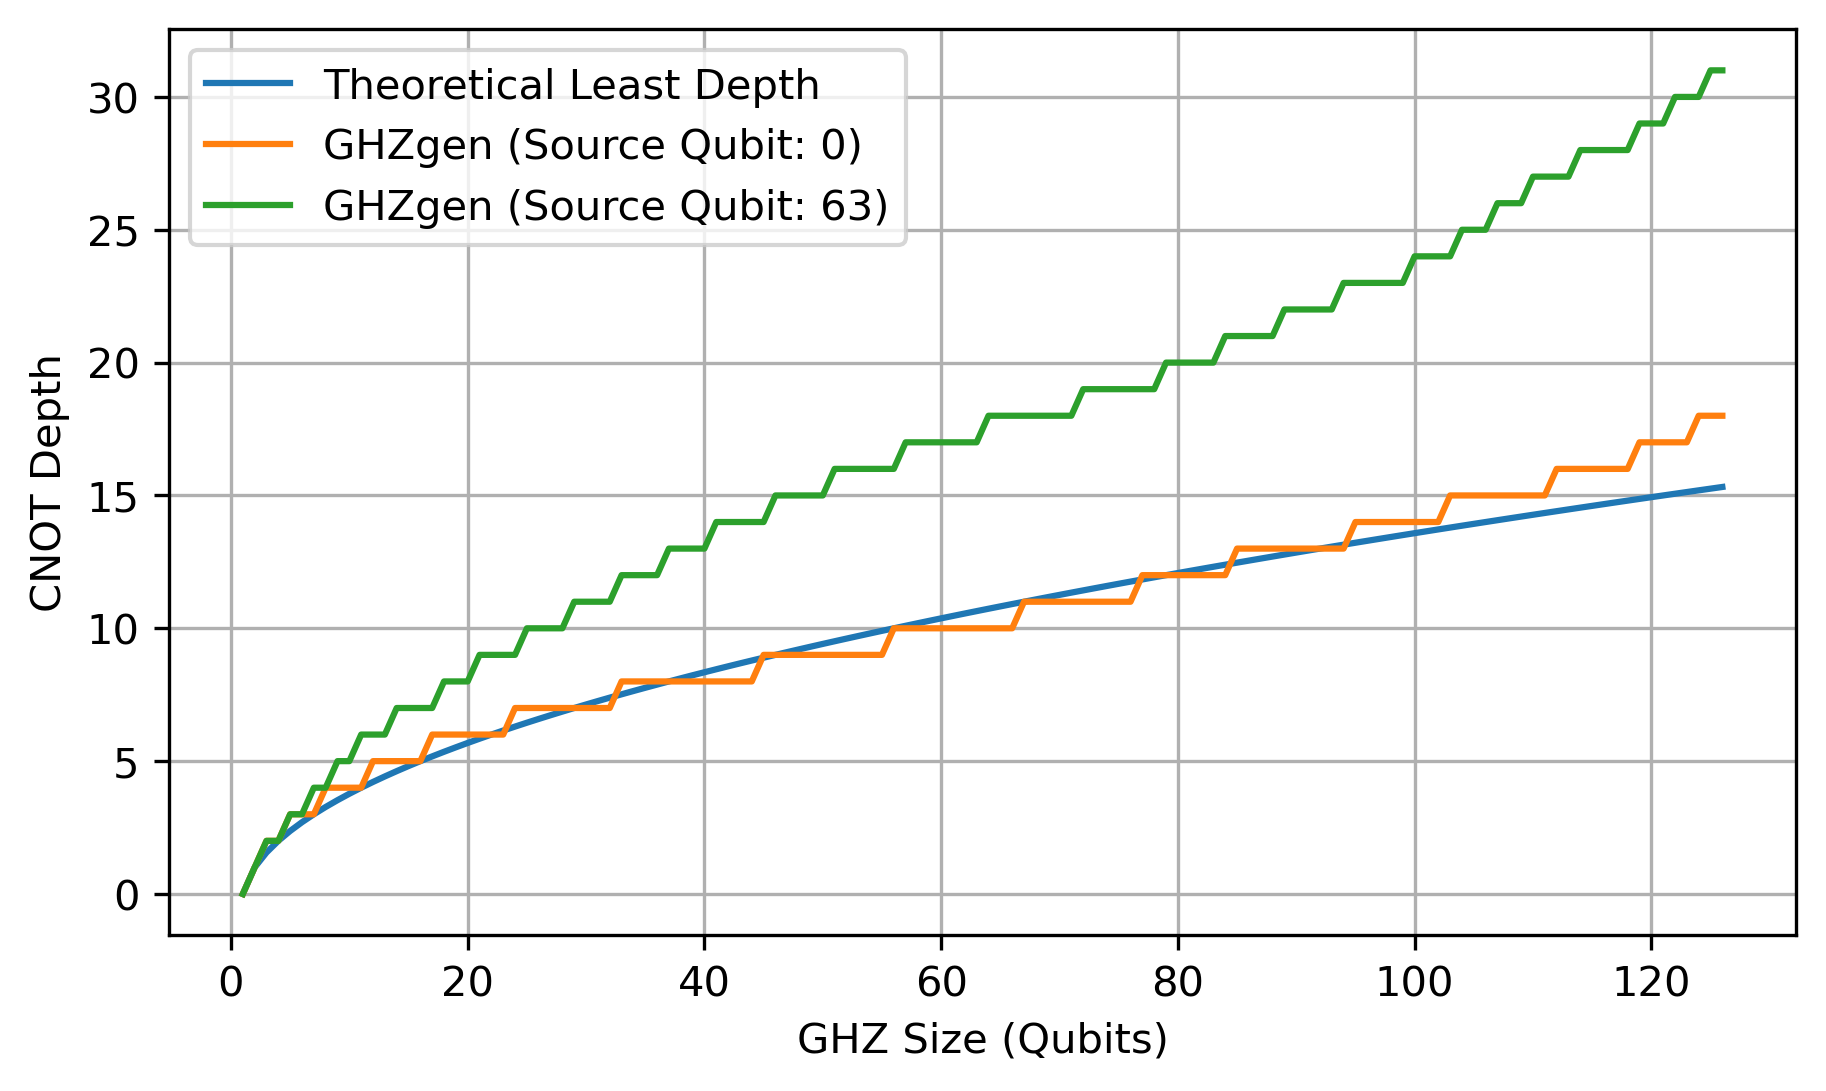

In [12]:
backend = provider.get_backend('ibm_washington')
ghz = GHZState(backend)

fig, ax = plt.subplots(figsize=(7, 4), dpi=300)

n = len(backend.properties().qubits)
X = [i for i in range(1, n)]
Y0 = [calc_d(i) for i in range(1, n)]
Y1 = [ghz.gen_circ_instr(i, 63)[2] for i in range(1, n)]
Y2 = [ghz.gen_circ_instr(i, 0)[2] for i in range(1, n)]

ax.plot(X, Y0, label='Theoretical Least Depth')
ax.plot(X, Y1, label='GHZgen (Source Qubit: 0)')
ax.plot(X, Y2, label='GHZgen (Source Qubit: 63)')

ax.set_xlabel('GHZ Size (Qubits)')
ax.set_ylabel('CNOT Depth')
ax.grid()
ax.legend()

fig.savefig('output/ghzdepthplot', bbox_inches='tight')

## Device Calibration for Measurement Error Mitigation (mthree)

In [4]:
from utilities import run_cal, load_cal

In [5]:
backend = provider.get_backend('ibm_washington')
#backend = provider.get_backend('ibmq_guadalupe')

mit = run_cal(backend)

In [ ]:
mit = load_cal(backend)
mit.single_qubit_cals

## GHZ Analysis (ibm_washington)

In [3]:
from time import time

from ghzstate import GHZState
from utilities import run_cal, load_cal

In [6]:
backend = provider.get_backend('ibm_washington')
ghz = GHZState(backend)

ghz_circ, initial_layout = ghz.gen_ghz_circuit(32)
fid_circuits = ghz.gen_fid_circuits(delays=[0])
print('GHZ Circuit Depth:', ghz_circ.depth())

GHZ Circuit Depth: 8


In [7]:
job = ghz.run_circuits()
mit = run_cal(backend, shots=8192)

print("GHZ Size:", len(initial_layout))
print("Job ID:", job.job_id())

GHZ Size: 32
Job ID: 63063387e82c246e13c8160a


In [8]:
#job = backend.retrieve_job('63063387e82c246e13c8160a')
ghz.load_cal()

pop_counts, mqc_counts = ghz.counts_from_result(job.result())
time0 = time()
pop_counts_mit, mqc_counts_mit = ghz.mitigate_counts(pop_counts, mqc_counts)
time1 = time()
print(f'Mitigation Time: {time1 - time0:.2f} s')

fidel, pop, coh = ghz.calc_fidelity(pop_counts, mqc_counts)
fidel_mit, pop_mit, coh_mit = ghz.calc_fidelity(pop_counts_mit, mqc_counts_mit)

Mitigation Time: 60.55 s


In [9]:
job = backend.retrieve_job('63063387e82c246e13c8160a')

In [9]:
print('Fidelity:', fidel)
print('Fidelity (mthree):', fidel_mit)

Fidelity: 0.2780389096361563
Fidelity (mthree): 0.5990606955188624


In [8]:
backend = provider.get_backend('ibm_washington')
ghz = GHZState(backend)

ghz_circ, initial_layout = ghz.gen_ghz_circuit(33)
fid_circuits = ghz.gen_fid_circuits(delays=[0])
print('GHZ Circuit Depth:', ghz_circ.depth())

job = ghz.run_circuits(shots=8192)
mit = run_cal(backend, shots=8192)

print("GHZ Size:", len(initial_layout))
print("Job ID:", job.job_id())

GHZ Circuit Depth: 9
GHZ Size: 33
Job ID: 6306e07b6aa72d1958573eb3


In [9]:
#job = backend.retrieve_job('63063387e82c246e13c8160a')
ghz.load_cal()

pop_counts, mqc_counts = ghz.counts_from_result(job.result())
time0 = time()
pop_counts_mit, mqc_counts_mit = ghz.mitigate_counts(pop_counts, mqc_counts)
time1 = time()
print(f'Mitigation Time: {time1 - time0:.2f} s')

fidel, pop, coh = ghz.calc_fidelity(pop_counts, mqc_counts)
fidel_mit, pop_mit, coh_mit = ghz.calc_fidelity(pop_counts_mit, mqc_counts_mit)

print('Fidelity:', fidel)
print('Fidelity (mthree):', fidel_mit)

Mitigation Time: 409.61 s
Fidelity: 0.1862415080813003
Fidelity (mthree): 0.5191216279579038


## Error Correlations

Source Qubit: 44

In [6]:
backend = provider.get_backend('ibm_washington')
ghz1 = GHZState(backend)
ghz_circ1, initial_layout1, error_dict1 = ghz1.gen_ghz_circuit(32, 44, output_error=True)
fid_circuits1 = ghz1.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout1[0])
print('GHZ Circuit Depth:', ghz_circ1.depth())
print('Net Errors:', error_dict1)

job1 = ghz1.run_circuits()
print("GHZ Size:", len(initial_layout1))
print("Job ID:", job1.job_id())

Source Qubit: 44
GHZ Circuit Depth: 8
Net Errors: {'cumcx': 1.7998935747708305, 'meancx': 0, 't1': 0.003272422401668404, 't2': 0.003151352412162634}
GHZ Size: 32
Job ID: 631beef076e4d19bf90b5966


In [7]:
ghz1.load_cal()
pop_counts1, mqc_counts1 = ghz1.counts_from_result(job1.result())
time0 = time()
pop_counts_mit1, mqc_counts_mit1 = ghz1.mitigate_counts(pop_counts1, mqc_counts1)
time1 = time()
print(f'Mitigation Time: {time1 - time0:.2f} s')

fidel1, pop1, coh1 = ghz1.calc_fidelity(pop_counts1, mqc_counts1)
fidel_mit1, pop_mit1, coh_mit1 = ghz1.calc_fidelity(pop_counts_mit1, mqc_counts_mit1)

print('Fidelity:', fidel1)
print('Fidelity (mthree):', fidel_mit1)

Mitigation Time: 65.66 s
Fidelity: 0.16692359851107794
Fidelity (mthree): 0.36162984521999564


Source Qubit: 63

In [8]:
backend = provider.get_backend('ibm_washington')
ghz2 = GHZState(backend)
ghz_circ2, initial_layout2, error_dict2 = ghz2.gen_ghz_circuit(32, 63, output_error=True)
fid_circuits2 = ghz2.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout2[0])
print('GHZ Circuit Depth:', ghz_circ2.depth())
print('Net Errors:', error_dict2)

job2 = ghz2.run_circuits()
print("GHZ Size:", len(initial_layout2))
print("Job ID:", job2.job_id())

Source Qubit: 63
GHZ Circuit Depth: 8
Net Errors: {'cumcx': 2.6366643243731542, 'meancx': 0, 't1': 0.0033191866126652952, 't2': 0.0028968339904832745}
GHZ Size: 32
Job ID: 631bf2cc43edaa6f5fed2e12


In [9]:
ghz2.load_cal()
pop_counts2, mqc_counts2 = ghz2.counts_from_result(job2.result())
time0 = time()
pop_counts_mit2, mqc_counts_mit2 = ghz2.mitigate_counts(pop_counts2, mqc_counts2)
time1 = time()
print(f'Mitigation Time: {time1 - time0:.2f} s')

fidel2, pop2, coh2 = ghz2.calc_fidelity(pop_counts2, mqc_counts2)
fidel_mit2, pop_mit2, coh_mit2 = ghz2.calc_fidelity(pop_counts_mit2, mqc_counts_mit2)

print('Fidelity:', fidel2)
print('Fidelity (mthree):', fidel_mit2)

Mitigation Time: 101.81 s
Fidelity: 0.12122963657490954
Fidelity (mthree): 0.34239771717301176


Source Qubit: 82

In [10]:
backend = provider.get_backend('ibm_washington')
ghz3 = GHZState(backend)
ghz_circ3, initial_layout3, error_dict3 = ghz3.gen_ghz_circuit(32, 82, output_error=True)
fid_circuits3 = ghz3.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout3[0])
print('GHZ Circuit Depth:', ghz_circ3.depth())
print('Net Errors:', error_dict3)

job3 = ghz3.run_circuits()
print("GHZ Size:", len(initial_layout3))
print("Job ID:", job3.job_id())

Source Qubit: 82
GHZ Circuit Depth: 8
Net Errors: {'cumcx': 2.309623955709478, 'meancx': 0, 't1': 0.003236804534629, 't2': 0.0026648882616461113}
GHZ Size: 32
Job ID: 631bf674753db649f912652f


In [11]:
ghz3.load_cal()
pop_counts3, mqc_counts3 = ghz3.counts_from_result(job3.result())
time0 = time()
pop_counts_mit3, mqc_counts_mit3 = ghz3.mitigate_counts(pop_counts3, mqc_counts3)
time1 = time()
print(f'Mitigation Time: {time1 - time0:.2f} s')

fidel3, pop3, coh3 = ghz3.calc_fidelity(pop_counts3, mqc_counts3)
fidel_mit3, pop_mit3, coh_mit3 = ghz3.calc_fidelity(pop_counts_mit3, mqc_counts_mit3)

print('Fidelity:', fidel3)
print('Fidelity (mthree):', fidel_mit3)

Mitigation Time: 110.05 s
Fidelity: 0.1049255909788414
Fidelity (mthree): 0.30747823003760366


## Fidelity vs. Size Plots

In [2]:
from time import time

from ghzstate import GHZState
from utilities import startup, run_cal, load_cal
provider = startup(check=False)

Account already enabled
Provider: ibm-q-melbourne


In [4]:
def fidel_from_result(ghzstate, result, cal=None, printinfo=True):
    ghzstate.load_cal(cal)
    pop_counts, mqc_counts = ghzstate.counts_from_result(result)
    time0 = time()
    pop_counts_mit, mqc_counts_mit = ghzstate.mitigate_counts(pop_counts, mqc_counts)
    time1 = time()
    
    nomit = ghzstate.calc_fidelity(pop_counts, mqc_counts)
    mit = ghzstate.calc_fidelity(pop_counts_mit, mqc_counts_mit)
    
    if printinfo is True:
        print(f'Mitigation Time: {time1 - time0:.2f} s')
        print(f'Fidelity: {nomit[0]}')
        print(f'Fidelity (mthree): {mit[0]}')
    
    return nomit, mit

def fidel_from_result_multi(ghzstate, results, cal=None, printinfo=True):
    nomit = []
    mit = []
    time0 = time()
    
    ghzstate.load_cal(cal)
    for result in results:
        pop_counts, mqc_counts = ghzstate.counts_from_result(result)
        pop_counts_mit, mqc_counts_mit = ghzstate.mitigate_counts(pop_counts, mqc_counts)

        nomit.append(ghzstate.calc_fidelity(pop_counts, mqc_counts))
        mit.append(ghzstate.calc_fidelity(pop_counts_mit, mqc_counts_mit))
    time1 = time()
    
    if printinfo is True:
        print(f'Mitigation Time ({len(results)} experiments): {time1 - time0:.2f} s')
    
    return nomit, mit

#### GHZ Size: 27

In [24]:
size = 27
backend = provider.get_backend('ibm_washington')
ghz27 = GHZState(backend)
ghz_circ27, initial_layout27 = ghz27.gen_ghz_circuit(size, 63)
fid_circuits27 = ghz27.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout27[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ27.depth())

Source Qubit: 63
GHZ Size: 27
GHZ Circuit Depth: 8


In [25]:
job27_0 = ghz27.run_circuits(printid=True)
job27_1 = ghz27.run_circuits(printid=True)
job27_2 = ghz27.run_circuits(printid=True)
job27_3 = ghz27.run_circuits(printid=True)
job27_4 = ghz27.run_circuits(printid=True)

#cal = run_cal(backend, filename='calibrations/ibm_washington27_cal')

Job ID: 63351f3c05c8fd07239022fa
Job ID: 63351f3fd95c8e391c62e4d0
Job ID: 63351f43d95c8ebb9162e4d1
Job ID: 63351f47fcf0f3843ceae700
Job ID: 63351f4b008546fbb20d5e39


In [7]:
cal = load_cal(backend, filename='calibrations/ibm_washington27_cal')
job27_0 = backend.retrieve_job('')
job27_1 = backend.retrieve_job('')
job27_2 = backend.retrieve_job('')
job27_3 = backend.retrieve_job('')
job27_4 = backend.retrieve_job('')

In [ ]:
nomit0, mit0 = fidel_from_result(ghz27, job0.result(), cal)

#### GHZ Size: 28

In [26]:
size = 28
backend = provider.get_backend('ibm_washington')
ghz28 = GHZState(backend)
ghz_circ28, initial_layout28 = ghz28.gen_ghz_circuit(size, 63)
fid_circuits28 = ghz28.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout28[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ28.depth())

Source Qubit: 63
GHZ Size: 28
GHZ Circuit Depth: 8


In [27]:
job28_0 = ghz28.run_circuits(printid=True)
job28_1 = ghz28.run_circuits(printid=True)
job28_2 = ghz28.run_circuits(printid=True)
job28_3 = ghz28.run_circuits(printid=True)
job28_4 = ghz28.run_circuits(printid=True)

#cal = run_cal(backend, filename='calibrations/ibm_washington28_cal')

Job ID: 63351f4ffcf0f30c70eae701
Job ID: 63351f525ccea744f6947ee2
Job ID: 63351f57e150f1b9c79e279e
Job ID: 63351f5a99f9dfc642133467
Job ID: 63351f5e5ccea74411947ee4


#### GHZ Size: 29

In [28]:
size = 29
backend = provider.get_backend('ibm_washington')
ghz29 = GHZState(backend)
ghz_circ29, initial_layout29 = ghz29.gen_ghz_circuit(size, 63)
fid_circuits29 = ghz29.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout29[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ29.depth())

Source Qubit: 63
GHZ Size: 29
GHZ Circuit Depth: 8


In [29]:
job29_0 = ghz29.run_circuits(printid=True)
job29_1 = ghz29.run_circuits(printid=True)
job29_2 = ghz29.run_circuits(printid=True)
job29_3 = ghz29.run_circuits(printid=True)
job29_4 = ghz29.run_circuits(printid=True)

#cal = run_cal(backend, filename='calibrations/ibm_washington29_cal')

Job ID: 63351f615ccea79042947ee5
Job ID: 63351f65008546d23e0d5e3a
Job ID: 63351f69008546774d0d5e3b
Job ID: 63351f6d22bb0169f7e8c292
Job ID: 63351f715ccea76f6f947ee6


#### GHZ Size: 30

In [30]:
size = 30
backend = provider.get_backend('ibm_washington')
ghz30 = GHZState(backend)
ghz_circ30, initial_layout30 = ghz30.gen_ghz_circuit(size, 63)
fid_circuits30 = ghz30.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout30[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ30.depth())

Source Qubit: 63
GHZ Size: 30
GHZ Circuit Depth: 8


In [31]:
job30_0 = ghz30.run_circuits(printid=True)
job30_1 = ghz30.run_circuits(printid=True)
job30_2 = ghz30.run_circuits(printid=True)
job30_3 = ghz30.run_circuits(printid=True)
job30_4 = ghz30.run_circuits(printid=True)

#cal = run_cal(backend, filename='calibrations/ibm_washington30_cal')

Job ID: 63351f74fcf0f30ed0eae702
Job ID: 63351f78fcf0f3178ceae703
Job ID: 63351f7cfcf0f34907eae704
Job ID: 63351f805ccea77ea6947ee8
Job ID: 63351f8400854650490d5e3d


#### GHZ Size: 31

In [32]:
size = 31
backend = provider.get_backend('ibm_washington')
ghz31 = GHZState(backend)
ghz_circ31, initial_layout31 = ghz31.gen_ghz_circuit(size, 63)
fid_circuits31 = ghz31.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout31[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ31.depth())

Source Qubit: 63
GHZ Size: 31
GHZ Circuit Depth: 8


In [33]:
job31_0 = ghz31.run_circuits(printid=True)
job31_1 = ghz31.run_circuits(printid=True)
job31_2 = ghz31.run_circuits(printid=True)
job31_3 = ghz31.run_circuits(printid=True)
job31_4 = ghz31.run_circuits(printid=True)

cal = run_cal(backend, filename='calibrations/ibm_washington31_cal')

Job ID: 63351f880085461a040d5e3e
Job ID: 63351f8d5ccea7dfea947ee9
Job ID: 63351f91542f506a6d1e7d17
Job ID: 63351f97008546d4e10d5e3f
Job ID: 63351f9c5ccea740d1947eea


#### GHZ Size: 32

In [5]:
size = 32
backend = provider.get_backend('ibm_washington')
ghz32 = GHZState(backend)
ghz_circ32, initial_layout32 = ghz32.gen_ghz_circuit(size, 46)
fid_circuits32 = ghz32.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout32[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ32.depth())

Source Qubit: 46
GHZ Size: 32
GHZ Circuit Depth: 8


In [6]:
job32_0 = ghz32.run_circuits(printid=True)
job32_1 = ghz32.run_circuits(printid=True)
job32_2 = ghz32.run_circuits(printid=True)
job32_3 = ghz32.run_circuits(printid=True)
job32_4 = ghz32.run_circuits(printid=True)
job32_5 = ghz32.run_circuits(printid=True)

cal = run_cal(backend, filename='calibrations/ibm_washington32_cal')

Job ID: 634a9605e53c00837700a4cd
Job ID: 634a960d3d7bcf228c9e4c7d
Job ID: 634a96123d7bcf4dae9e4c7e
Job ID: 634a9617d31ce776abd820ee
Job ID: 634a961b6c7c483a356be599
Job ID: 634a96200a4a0c4f5dd02d1c


In [8]:
nomit32_0, mit32_0 = fidel_from_result(ghz32, job32_0.result(), cal)
nomit32_1, mit32_1 = fidel_from_result(ghz32, job32_1.result(), cal)
nomit32_2, mit32_2 = fidel_from_result(ghz32, job32_2.result(), cal)
nomit32_3, mit32_3 = fidel_from_result(ghz32, job32_3.result(), cal)
nomit32_4, mit32_4 = fidel_from_result(ghz32, job32_4.result(), cal)
nomit32_5, mit32_5 = fidel_from_result(ghz32, job32_5.result(), cal)

Mitigation Time: 516.76 s
Fidelity: 0.15472222910910785
Fidelity (mthree): 0.3625989181800028
Mitigation Time: 514.96 s
Fidelity: 0.15582629530037523
Fidelity (mthree): 0.3712564447851252
Mitigation Time: 480.71 s
Fidelity: 0.1639804080188238
Fidelity (mthree): 0.38406515499373867
Mitigation Time: 506.84 s
Fidelity: 0.15291287589801703
Fidelity (mthree): 0.3547863665297449
Mitigation Time: 491.26 s
Fidelity: 0.16428398869256078
Fidelity (mthree): 0.38107394535689687


KeyboardInterrupt: 

#### GHZ Size: 33

In [1]:
size = 33
backend = provider.get_backend('ibm_washington')
ghz33 = GHZState(backend)
ghz_circ33, initial_layout33 = ghz33.gen_ghz_circuit(size, 46)
fid_circuits33 = ghz33.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout33[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ33.depth())

NameError: name 'provider' is not defined

In [23]:
job33_0 = ghz33.run_circuits(printid=True)
job33_1 = ghz33.run_circuits(printid=True)
job33_2 = ghz33.run_circuits(printid=True)
job33_3 = ghz33.run_circuits(printid=True)
job33_4 = ghz33.run_circuits(printid=True)
job33_5 = ghz33.run_circuits(printid=True)

cal = run_cal(backend, filename='calibrations/ibm_washington33_cal')

Job ID: 6343cc800a4a0c804bd018d4
Job ID: 6343cc8cea97baa29ee17ecf
Job ID: 6343cc91cbdc4dc698c0f03c
Job ID: 6343cc96d31ce7698cd80cfa
Job ID: 6343cc9c34425f481aca406b
Job ID: 6343cca168409fefbd2c53ea


In [209]:
cal = load_cal(backend, filename='calibrations/ibm_washington33_cal')

job33_0 = backend.retrieve_job('6343cc800a4a0c804bd018d4')
job33_1 = backend.retrieve_job('6343cc8cea97baa29ee17ecf')
job33_2 = backend.retrieve_job('6343cc91cbdc4dc698c0f03c')
job33_3 = backend.retrieve_job('6343cc96d31ce7698cd80cfa')
job33_4 = backend.retrieve_job('6343cc9c34425f481aca406b')
job33_5 = backend.retrieve_job('6343cca168409fefbd2c53ea')

In [ ]:
nomit33_0, mit33_0 = fidel_from_result(ghz33, job33_0.result(), cal)
nomit33_1, mit33_1 = fidel_from_result(ghz33, job33_1.result(), cal)
nomit33_2, mit33_2 = fidel_from_result(ghz33, job33_2.result(), cal)
nomit33_3, mit33_3 = fidel_from_result(ghz33, job33_3.result(), cal)
nomit33_4, mit33_4 = fidel_from_result(ghz33, job33_4.result(), cal)
nomit33_5, mit33_5 = fidel_from_result(ghz33, job33_5.result(), cal)

In [196]:
pop_counts, mqc_counts = ghz33.counts_from_result(job33_5.result())
mit = cal
ghz33.load_cal(mit)
pop_counts_mit = pop_counts.copy()
mqc_counts_mit = mqc_counts.copy()
ghz33.calc_fidelity(pop_counts, mqc_counts)

(0.1739323033991067, 0.229736328125, 0.11812827867321338)

In [154]:
mit33_5

(0.3670355516840912, 0.5511712124571444, 0.18289989091103803)

In [158]:
pcounts, info = mit.apply_correction(pop_counts['t0'], ghz33.initial_layout, details=True)
pcounts = pcounts.nearest_probability_distribution()
for bitstr, count in pcounts.items():
    pcounts[bitstr] = count*ghz33.shots
pop_counts_mit['t0'] = pcounts

In [159]:
ghz33.calc_pop(pop_counts_mit)

0.5511712124571444

In [185]:
ccounts = mit.apply_correction(mqc_counts['t0'], ghz33.initial_layout)
#ccounts = ccounts.nearest_probability_distribution()

In [203]:
for i, counts_dict in enumerate(ccounts):
    for bitstr, count in counts_dict.items():
        mqc_counts_mit['t0'][i][bitstr] = count*ghz33.shots

In [204]:
ghz33.calc_coh(mqc_counts_mit)

0.18663208815321855

In [207]:
import numpy as np
2*np.sqrt(ccounts[0]['0'*33])

0.5826197208661943